### Sprawdzenie zawartości zbiorów i wybór zbioru
##### Autorzy: Kacper Krzyżniewski, Dominik Ossowski

Dataset 00: https://www.kaggle.com/datasets/atulyakumar98/gundetection?resource=download  
Dataset 01: https://www.kaggle.com/datasets/issaisasank/guns-object-detection  
Dataset 02: https://www.kaggle.com/datasets/andrewmvd/handgun-detection  

---

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import re
import json
import pprint

---
### Check file extensions from each dataset

In [20]:
# .\\data\\dataset00\\archive
# .\\data\\dataset01\\Images
# .\\data\\dataset02\\export

# Constants
DATASET_00_PATH = '.\\data\\dataset00\\archive'
DATASET_01_PATH = '.\\data\\dataset01\\Images'
DATASET_02_PATH = '.\\data\\dataset02\\export'
DATASET_PATHS = np.array([DATASET_00_PATH, DATASET_01_PATH, DATASET_02_PATH])

In [21]:
# Load extentions
extentions_00 = np.array([os.path.splitext(file)[1] for file in os.listdir(DATASET_00_PATH)])
extentions_01 = np.array([os.path.splitext(file)[1] for file in os.listdir(DATASET_01_PATH)])
extentions_02 = np.array([os.path.splitext(file)[1] for file in os.listdir(DATASET_02_PATH)])
extentions = np.array([extentions_00, extentions_01, extentions_02], dtype=object)

In [22]:
# Print unique extentions
for i in range(len(extentions)):
    print(f'Dataset {i} unique file extentions: ')
    print(np.unique(extentions[i]))
    print()

Dataset 0 unique file extentions: 
['.jpg' '.txt']

Dataset 1 unique file extentions: 
['.jpeg']

Dataset 2 unique file extentions: 
['.jpg' '.json']



---
### Print jpg file count in each dataset

In [23]:
# Regex to match jpg files (jpg, jpeg, JPG, JPEG)
jpg_regex = re.compile(r'.*\.jpe?g$', re.IGNORECASE)

# Print jpg file count
for i in range(len(extentions)):
    print(f'Dataset {i} jpg/jpeg file count: ')
    print(len(list(filter(jpg_regex.match, os.listdir(DATASET_PATHS[i])))))
    print()


Dataset 0 jpg/jpeg file count: 
3000

Dataset 1 jpg/jpeg file count: 
333

Dataset 2 jpg/jpeg file count: 
2971



---
### Display image size distribution in for each dataset

In [24]:
# Save jpg file paths to a list
images_00 = np.array([os.path.join(DATASET_00_PATH, file) for file in os.listdir(DATASET_00_PATH) if jpg_regex.match(file)])
images_01 = np.array([os.path.join(DATASET_01_PATH, file) for file in os.listdir(DATASET_01_PATH) if jpg_regex.match(file)])
images_02 = np.array([os.path.join(DATASET_02_PATH, file) for file in os.listdir(DATASET_02_PATH) if jpg_regex.match(file)])
images = np.array([images_00, images_01, images_02], dtype=object)

# Get image sizes
sizes_00 = np.array([cv2.imread(image).shape for image in images_00])
sizes_01 = np.array([cv2.imread(image).shape for image in images_01])
sizes_02 = np.array([cv2.imread(image).shape for image in images_02])
sizes = np.array([sizes_00, sizes_01, sizes_02], dtype=object)

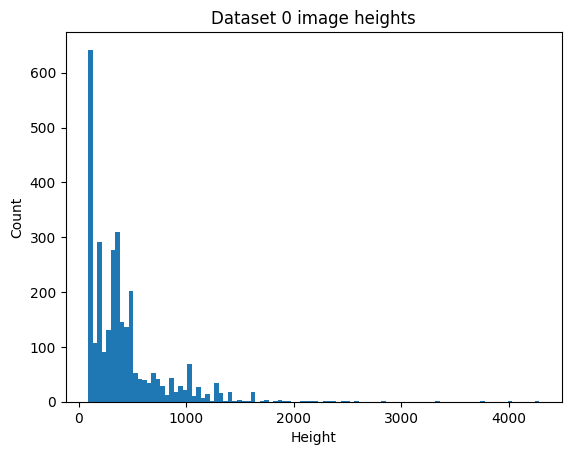

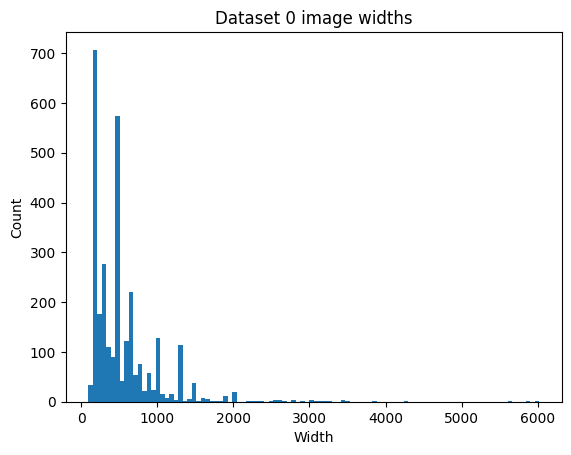

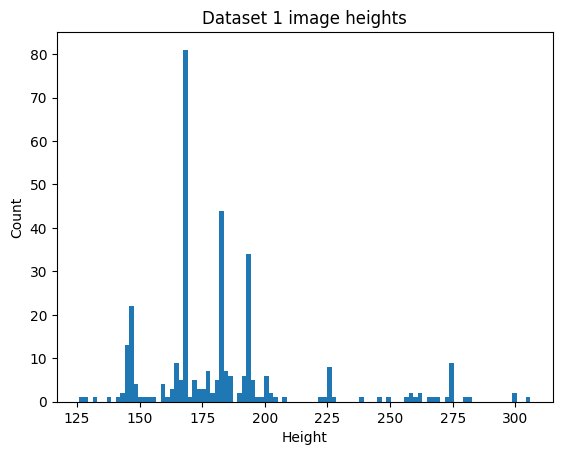

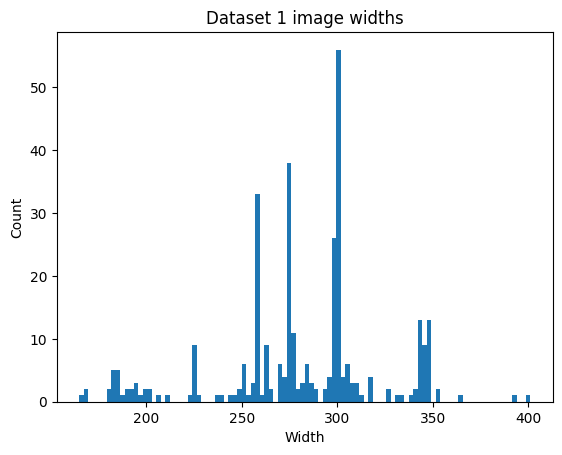

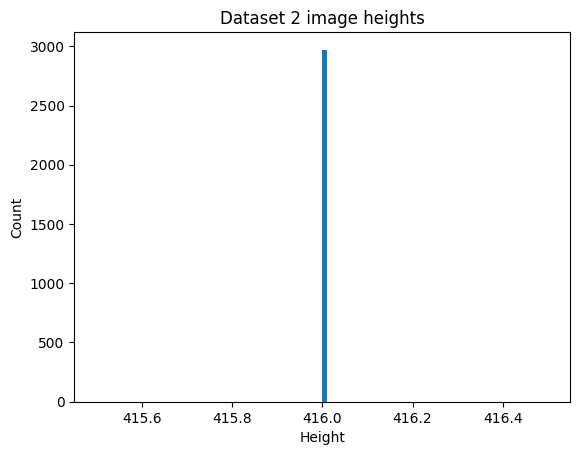

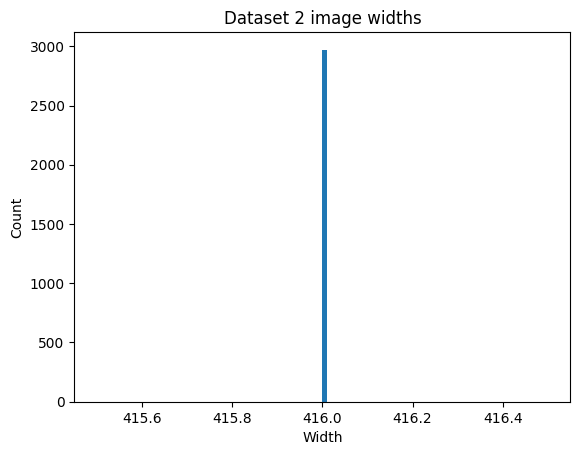

In [25]:
# Plot image sizes in a histogram
for i in range(len(sizes)):
    plt.figure()
    plt.hist(sizes[i][:, 0], bins=100)
    plt.title(f'Dataset {i} image heights')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()

    plt.figure()
    plt.hist(sizes[i][:, 1], bins=100)
    plt.title(f'Dataset {i} image widths')
    plt.xlabel('Width')
    plt.ylabel('Count')
    plt.show()

---
### Check image channels

In [26]:
# Print unique image channels
for i in range(len(sizes)):
    print(f'Dataset {i} unique image channels: ')
    print(np.unique(sizes[i][:, 2]))
    print()

Dataset 0 unique image channels: 
[3]

Dataset 1 unique image channels: 
[3]

Dataset 2 unique image channels: 
[3]



---
### Check image labelling

In [27]:
# Dataset 00 labels are in .txt files with the same name as the image
# Dataset 01 labels are here '.\\data\\dataset01\\Labels', file names are the same as the image
# Dataset 02 labels are in this file _annotations.coco.json

# Constants for labels
DATASET_00_LABELS = '.\\data\\dataset00\\archive'
DATASET_01_LABELS = '.\\data\\dataset01\\Labels'
DATASET_02_LABELS = '.\\data\\dataset02\\export\\_annotations.coco.json'
 

In [28]:
# Get all text files from directory
label_00_paths = np.array([os.path.join(DATASET_00_LABELS, file) for file in os.listdir(DATASET_00_LABELS) if file.endswith('.txt')])
label_01_paths = np.array([os.path.join(DATASET_01_LABELS, file) for file in os.listdir(DATASET_01_LABELS) if file.endswith('.txt')])

# Get json file path
label_02_path = DATASET_02_LABELS

In [29]:
# Print an example label contents
print('Dataset 00 label example: ')
print(open(label_00_paths[0], 'r').read())

Dataset 00 label example: 
1 0.27291666666666664 0.3482758620689655 0.5208333333333334 0.6827586206896552
1 0.7520833333333333 0.6620689655172414 0.4791666666666667 0.6758620689655173


`These labels are in YOLO format.`

In [30]:
print('Dataset 01 label example: ')
print(open(label_01_paths[0], 'r').read())

Dataset 01 label example: 
1
76 45 146 87



`This is the labelling: the first line contains the number of objects in the corresponding image and the next lines contain the co-ordinates of the box describing the object.`

In [31]:
# Load json file
# images
# annotations

df_images = pd.DataFrame(json.load(open(label_02_path, 'r'))['images'])
df_annotations = pd.DataFrame(json.load(open(label_02_path, 'r'))['annotations'])

In [32]:
df_images.head()

id  license                                          file_name  height   
0   0        1  armas (2178).jpg.rf.0095da5f53aa7d641eaeafc9c9...     416  \
1   1        1  armas (289).jpg.rf.00b9b08dd75560324ef6c062f21...     416   
2   2        1  armas (1757).jpg.rf.007b0a919d789c664d948b38ee...     416   
3   3        1  armas (2531).jpg.rf.008c9a1b51abe57af17789055e...     416   
4   4        1  armas (112).jpg.rf.00047bf728076017d2bbd6a3834...     416   

   width              date_captured  
0    416  2020-02-23T14:16:14+00:00  
1    416  2020-02-23T14:16:14+00:00  
2    416  2020-02-23T14:16:14+00:00  
3    416  2020-02-23T14:16:14+00:00  
4    416  2020-02-23T14:16:14+00:00

In [33]:
df_annotations.head()

id  image_id  category_id   
0   0         0            1  \
1   1         1            1   
2   2         2            1   
3   3         2            1   
4   4         3            1   

                                               bbox           area   
0                 [5, 3, 400.40000000000003, 395.2]  158238.080000  \
1            [209, 106, 176.10666666666668, 147.68]   26007.432533   
2    [26, 47, 388.96000000000004, 289.865889212828]  112746.236268   
3     [5, 8, 392.08000000000004, 293.5043731778426]  115077.194636   
4  [23, 42, 361.40000000000003, 336.26666666666665]  121526.773333   

  segmentation  iscrowd  
0           []        0  
1           []        0  
2           []        0  
3           []        0  
4           []        0

---
### Display a few images for check

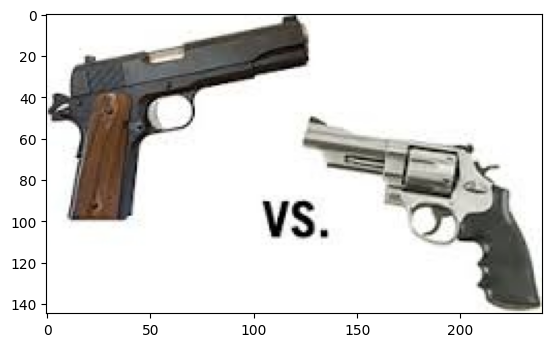

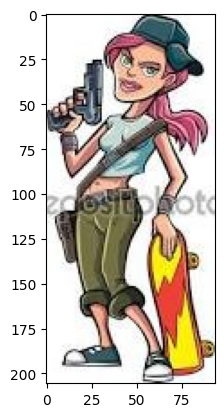

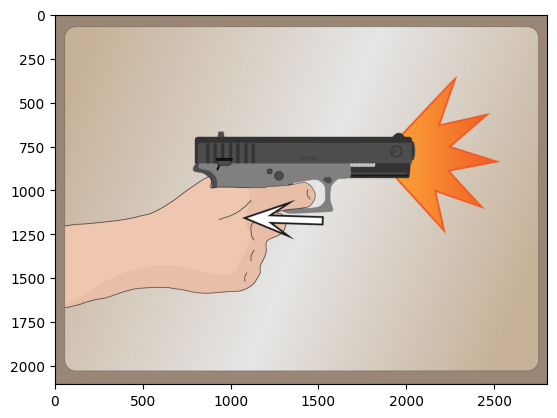

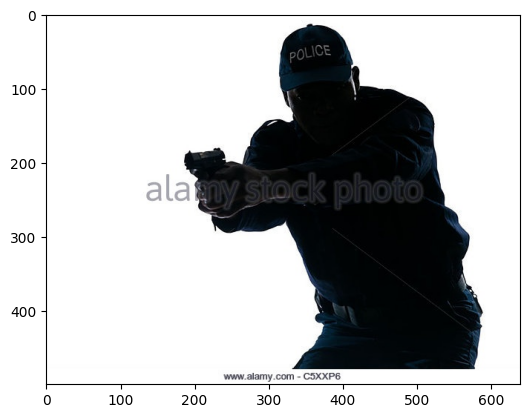

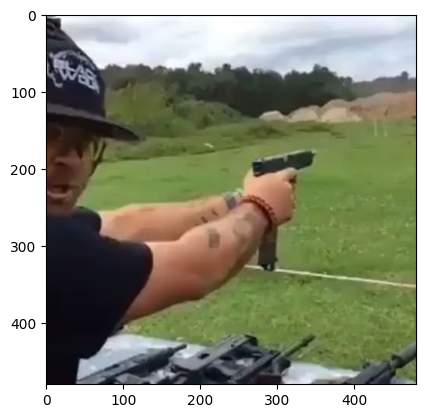

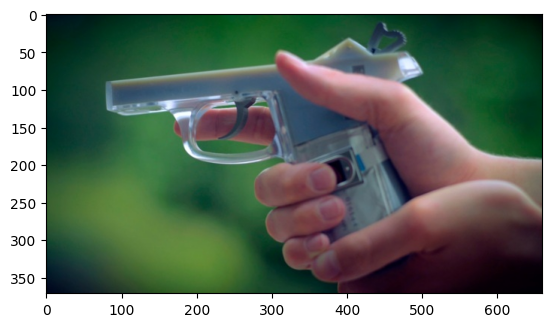

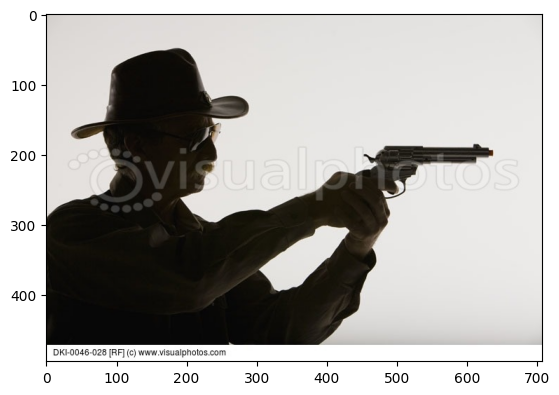

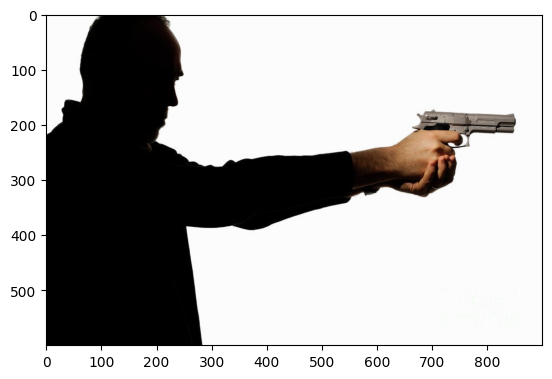

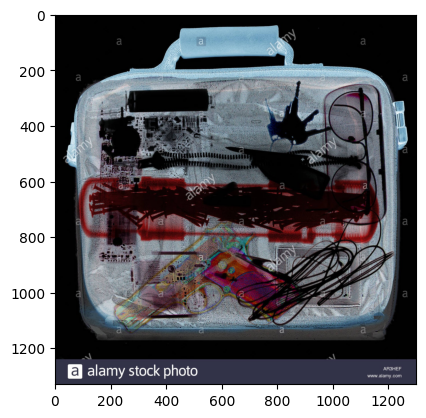

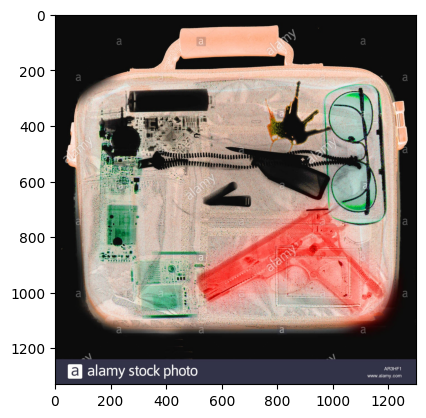

In [34]:
# Display 10 images from dataset 00
for i in range(10):
    plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(images_00[i]), cv2.COLOR_BGR2RGB))
    plt.show()


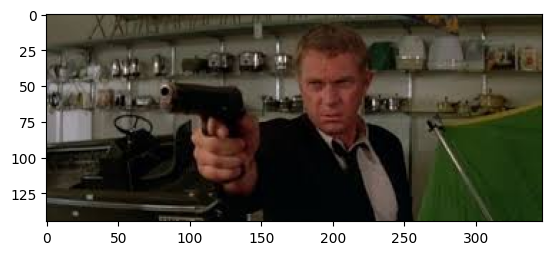

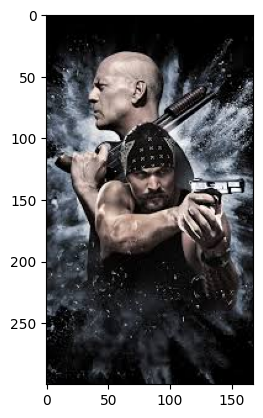

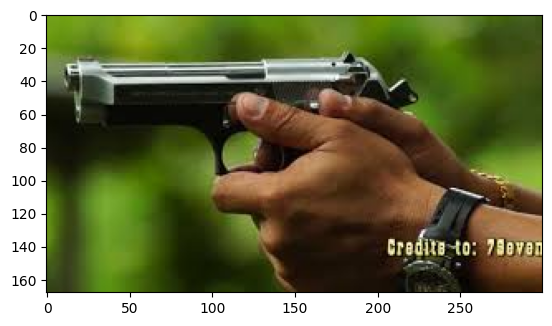

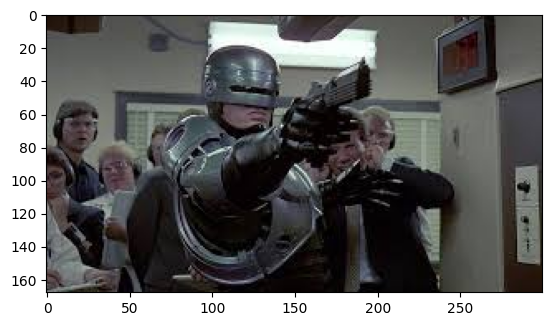

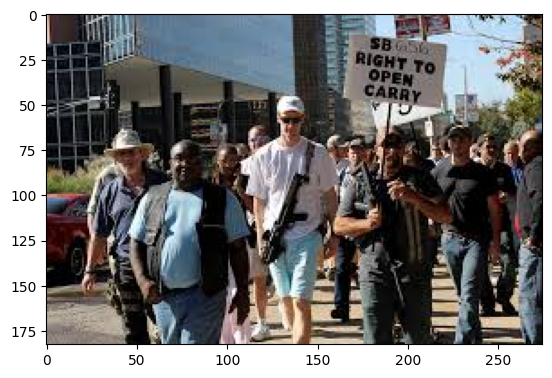

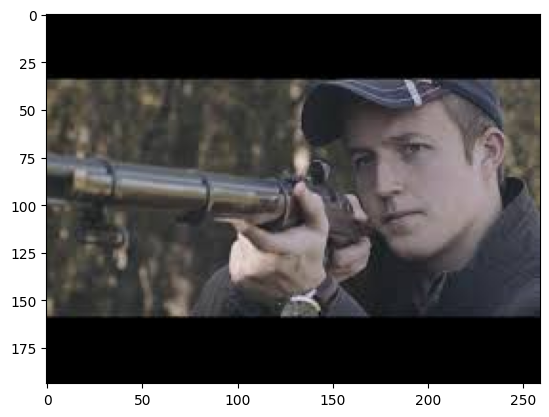

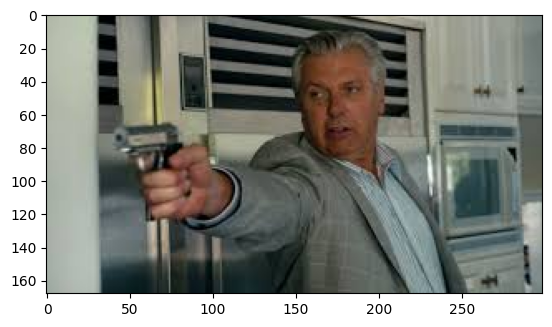

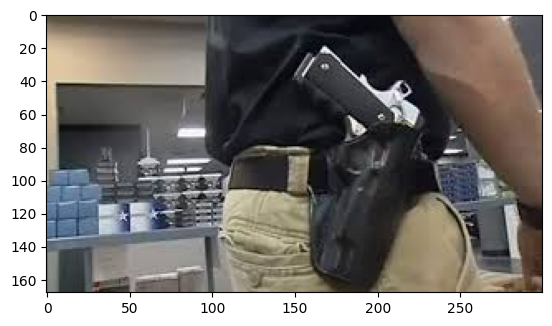

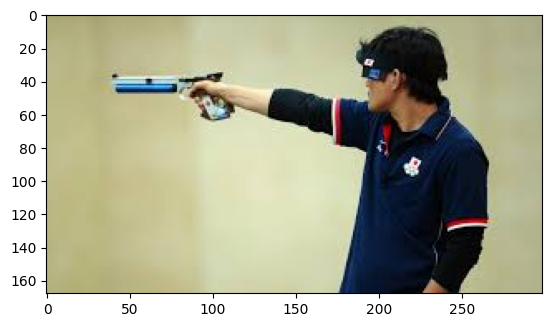

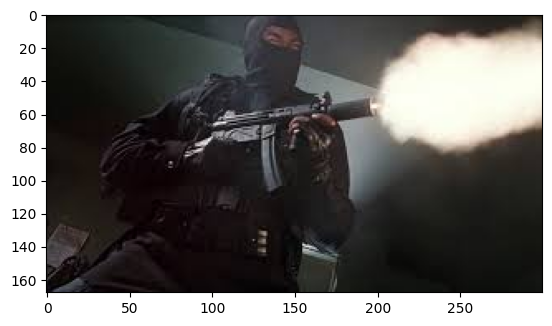

In [35]:
# Display 10 images from dataset 01
for i in range(10):
    plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(images_01[i]), cv2.COLOR_BGR2RGB))
    plt.show()

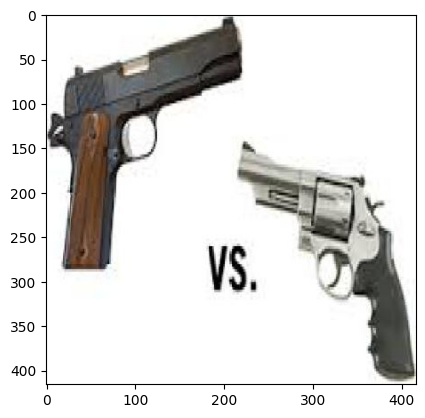

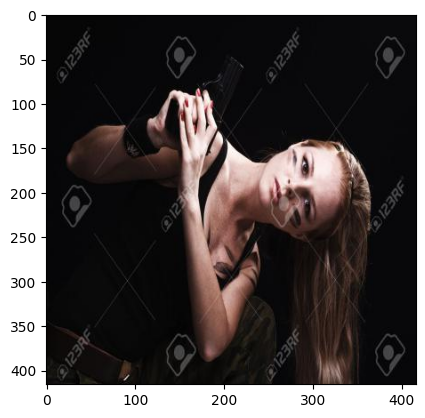

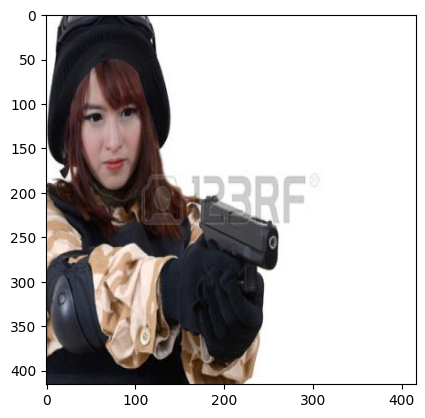

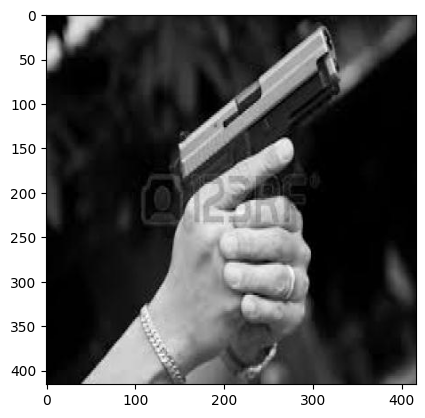

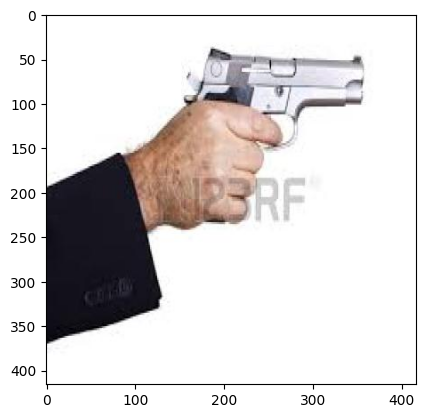

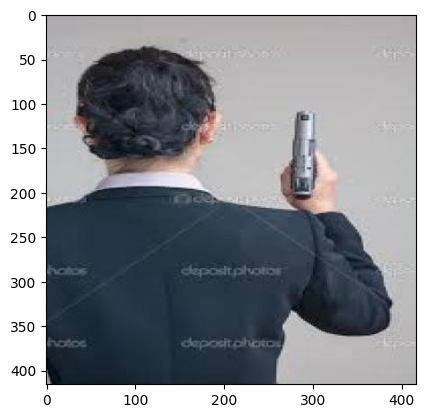

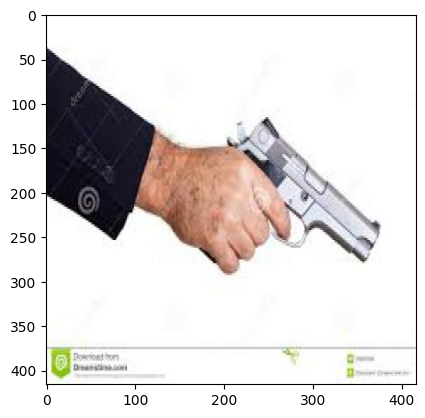

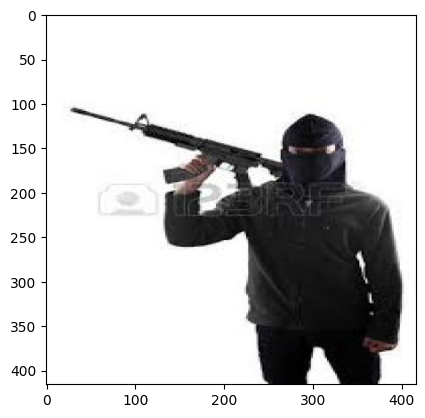

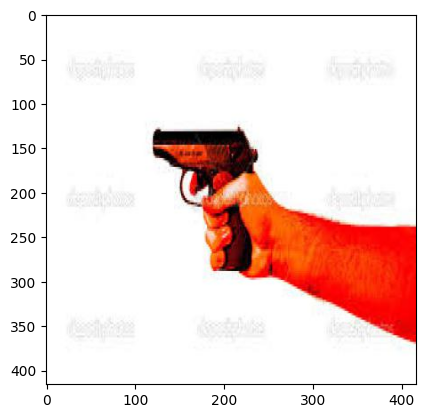

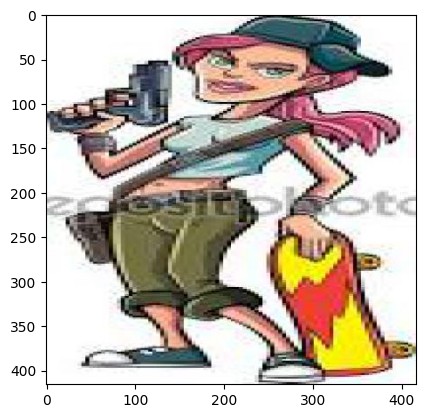

In [36]:
# Display 10 images from dataset 02
for i in range(10):
    plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(images_02[i]), cv2.COLOR_BGR2RGB))
    plt.show()

---
### Wnioski i jak wybraliśmy nasz zbiór

- Każdy ze zbiorów posiada ujednolicone zdjęcia w formacie .jpg.
- Zbiór 0 i 1 zawierają zdjęcia o różnych wymiarach, natomiast w zbiorze 2 wymiary te zostały sprowadzone do tej samej wartości.
- Wszystkie zdjęcia ze wybranych zbiorów posiadają 3 kanały kolorów.
- Jakość zdjęć w zbiorze 1, jest o wiele lepsza - zdjęcia przedstawiają prawdziwych ludzi trzymających broń w realistycznych warunkach, jednak zbiór ten posiada wyłącznie 300 zdjęć.
- Zbiory 0 i 2 posiadają o wiele więcej zdjęć (po 3000), jednak pochodzą one głównie z internetu.
- Zbiór 2 wyróżnia się jakością etykietowania, etykiety jest łatwo odczytać z pliku .json, a zawarte dane są rozbudowane - występuje np. zmienna isCrowd.





Pomimo, że zbiór 2 wydaje się na pierwszy rzut oka najlepszym wyborem, zdecydowaliśmy się na zbiór 1, ze względu na:
- Zbiór 2 nie posiada żadnych konkretnych ocen ani opini.
- Zbiór 1 jest o wiele lepszy, jeżeli chodzi o jakość zdjęć.
- Zbiór 1 posiada bardzo dobre opinie na Kagglu.
- Zbiór 1 był szeroko wykorzystywany do trenowania modeli detekcji broni na zdjęciach.